<a href="https://colab.research.google.com/github/truffleToast/DeepLearning/blob/main/ex04_%E1%84%80%E1%85%A2_%E1%84%80%E1%85%A9%E1%84%8B%E1%85%A3%E1%86%BC%E1%84%8B%E1%85%B5_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/dogs_vs_cats_small
# 데이터 경로 지정
train_dir = '/content/drive/MyDrive/Colab Notebooks/deepLearning/data/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/deepLearning/data/dogs_vs_cats_small/validation'

train_dir_dog = os.path.join(train_dir, "dogs")
train_dir_cat = os.path.join(train_dir, "cats")
valid_dir_dog = os.path.join(valid_dir, "dogs")
valid_dir_cat = os.path.join(valid_dir, "cats")

In [3]:
import os

print(f"훈련데이터 개수 (개) : {len(os.listdir(train_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(train_dir_cat))}")
print(f"훈련데이터 개수 (개) : {len(os.listdir(valid_dir_dog))}")
print(f"훈련데이터 개수 (고양이) : {len(os.listdir(valid_dir_cat))}")

훈련데이터 개수 (개) : 1000
훈련데이터 개수 (고양이) : 1000
훈련데이터 개수 (개) : 500
훈련데이터 개수 (고양이) : 500


In [4]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 픽셀값 변경 (0~255 정수) -> (0~1 실수)
## 1. 숫자의 크기 줄이기
## 2. 분산(값이 분표해있는 범위) 줄이기 -> 연산 상의 오류 줄어듦
# 이미지 크기 맞춰주기(150,150)
# 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# 픽셀값 변경하기
# 묵시적 형변환 하기
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기
generator = ImageDataGenerator(rescale = 1./255) # 1. -> 1.0

In [6]:
# 하나의 변수에 이미지 파일 전부 합치기
# 이미지 크기 동일하게 만들어주기
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.


In [7]:
valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 1000 images belonging to 2 classes.


In [8]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten

In [9]:
# Dense만 사용 = MLP
# Conv, Pool 주로 사용 = CNN
# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     input_shape = (150,150,3), # 입력 데이터의 모양 (3 = RGB(Red, Green, Blue))  # 0 : 검은색, 255 : 흰색
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

####################### 특징 추출부 끝 #######################
model1.add(Flatten()) #  특징 추출부와 분류부를 이어주는 역할
####################### 분류 분석 시작 #######################
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']

)

In [11]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5515 

KeyboardInterrupt: ignored

In [ ]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread("/content/image_me.jpg",cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지 차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

In [ ]:
# 0 = cat
# 1 = dog
# 대다수의 사람이 개라는 결과를 얻음
# -> 모델이 학습이 덜 되어서 개의 규칙은 잘 찾았지만 고양이의 규칙은 잘 찾지 못했기 때문
model1.predict(pre_img)

In [ ]:
# 부동 소수점 : 소수점의 위치가 변하지 않는
# 1.7243704e-35 = 1.7243704 * 10^(-35) <- 0이다!!!!!!!!!!

In [ ]:
# train accuracy : 0.98
# val accuracy : 0.7
# train은 학습이 잘 됐고, val은 학습이 안 됐다. -> 과대적합에 걸렸다
# 과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다(추가적으로 데이터를 수집) -> 많이 어려움
# 2. 모델을 더 깊게 구성한다. (층을 더 많이 쌓는다.)
# 3. 데이터를 확장한다.(가지고 있는 데이터를 다양하게 표현)

In [ ]:
# 데이터 확장을 하고 새롭게 학습한다
# 데이터를 확장하면 원본 데이터는 사라진다
# 모델 설계 -> 확장 안 된 이미지로 학습 -> 결과 확인 -> 만족스럽지 않다 -> 데이터 확장 후 학습

In [ ]:
# 기존 모델에 확장 데이터로 학습하기
aug_generator = ImageDataGenerator(
    rescale = 1./255, # 픽셀값 조정
    rotation_range = 20, # 회전 범위
    width_shift_range = 0.1, # 수평 이동
    height_shift_range = 0.1, # 수직 이동
    shear_range = 0.1, # 반시계 방향 회전
    zoom_range = 0.1, # 확대/축소 비율
    horizontal_flip = True, # 수평 뒤집기
    fill_mode = 'nearest' # 가까운 값으로 비어있는 곳을 채운다
)

In [ ]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

In [ ]:
model1.fit(
    train_aug_generator,
    epochs = 20,
    validation_data = valid_generator
)

# 과대적합을 줄이는 방법들
- 증식
  - 장점 : 간단
  - 단점 : 가짜는 가짜다 (급격한 성능 향상은 없다)
  - epoch 수는 증가시켜주어야 한다.
- Dropout()
  - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
  - epoch마다 사용하지 않는 퍼셉트론은 랜덤
- BatchNormalization()
  - CNN층 = Conv(특성 추출) + Maxpooling(크기 축소)
  - Conv층의 파라미터를 정규화 (평균 0, 분산 1)         
    -> 음수가 발생                                     
    -> relu 를 적용하면                                           
    -> 음수가 사라지는 문제                              
    -> leaky relu
- GlobalAveragePooling2D()
  - CNN에서 가장 문제가 되는 층 : Maxpooling층         
    -> CNN 속도의 60% 이상을 차지
  - Maxpooling2D + Flatten()
  - Dense 층과 연결되는 층에 사용
  

- Data Generator : 학습을 시킬 때 한 번에 전체 데이터를 가져오는 것이 아니라 batch_size만큼씩만 가져와서 처리하도록 하는 것 (메모리 자원 부족을 해결)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale = 1./255)

train_generator = generator.flow_from_directory(
    directory = train_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

valid_generator = generator.flow_from_directory(
    directory = valid_dir, # train 이미지 경로, 변환할 이미지
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 개수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
# label(라벨)은 알파벳 순으로 0부터 부여
train_generator.class_indices, valid_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

- 신경망 설계


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     input_shape = (150,150,3), # 입력 데이터의 모양 (3 = RGB(Red, Green, Blue))  # 0 : 검은색, 255 : 흰색
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

####################### 특징 추출부 끝 #######################
model1.add(Flatten())
####################### 분류 분석 시작 #######################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dropout_1 (Dropout)         (None, 41472)            

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

# GlobalAverage2D

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     input_shape = (150,150,3), # 입력 데이터의 모양 (3 = RGB(Red, Green, Blue))  # 0 : 검은색, 255 : 흰색
     activation = 'relu'
))

model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
    pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
))

model1.add(Conv2D(  # 특징 찾기
     filters = 32, # 찾을 특징의 개수
     kernel_size = (3,3), # 특징의 크기
     activation = 'relu'
))

# model1.add(MaxPool2D( # 특징이 아닌 부분 삭제하기
#     pool_size = (2,2) # 기준 크기에서 한 개의 특징만 가져오기 / 4개 중 1개 사용하기
# ))

# ####################### 특징 추출부 끝 #######################
# model1.add(Flatten())
model1.add(GlobalAveragePooling2D())
####################### 분류 분석 시작 #######################
model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

- BatchNormalization()
  - Conv2D()와 activation() 층 사이에 배치
  - Activaition()이 정규화 기능을 일부 수행 ->
Activaition() 다음에 배치하면 효과가 떨어짐
-> C+B+A+M => C+ A + B+ M

- 확실하게 성능이 향상됨
- 단점 :참 좋은데 설명할 길이 없네

In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation

model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())
model1.add(Activation("leaky_relu"))
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = 'leaky_relu'))
model1.add(BatchNormalization())
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 72, 72, 32)      

In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

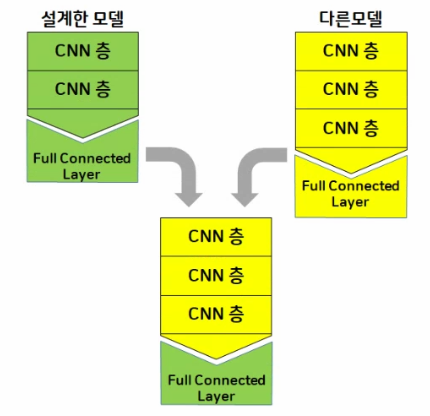

- 전이 학습을 하는 이유
  - 데이터가 부족
  - 설계한 신경망 그닥 좋지 못함
- 전이학습의 종류
  - CNN층을 그대로 사용하는 것(가중치)
  - 특성추출: CNN 층의 가중치를 그대로 사용
  - 미세조정: fine tuning : CNN층의 가중치를 일부 살짝 변경해서 사용

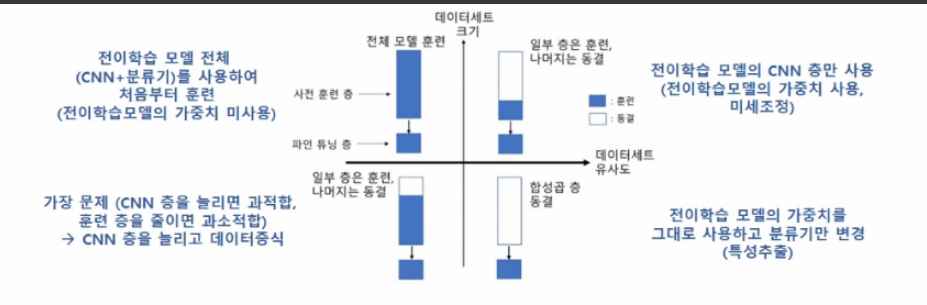

In [72]:
from tensorflow.keras.applications import VGG16

#weights : 사용할 가중치의 종류
# include_top = False: 모델을 전체 가져올 것인지 선택(False : 특성추출기 만 가져오기 Dense층 x)
# incput_shape:
conv_base =VGG16(weights= 'imagenet',
                 include_top = False,
                 input_shape =(150,150 ,3)
                 )

In [73]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

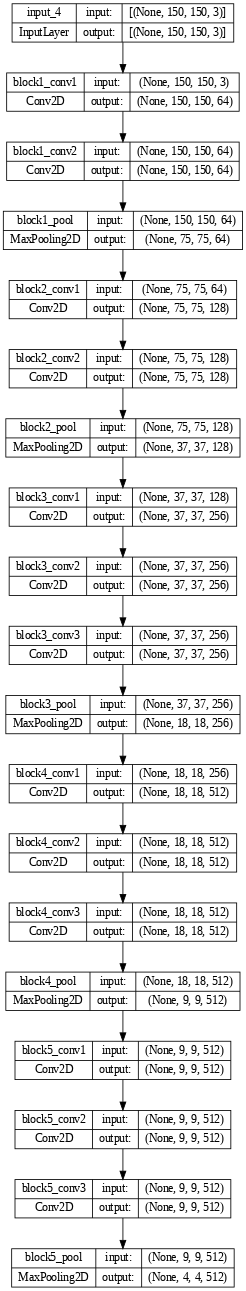

In [74]:
#plot_model로 시각화
from tensorflow.keras.utils import plot_model
#show_shapes = True : 신경망 형태 표시 여부
#dpi =60 : 해상도 , 이미지 출력 크기
plot_model(conv_base, show_shapes= True, dpi =60)

- 이미지로 시각화 하기

In [75]:
!pip install visualkeras

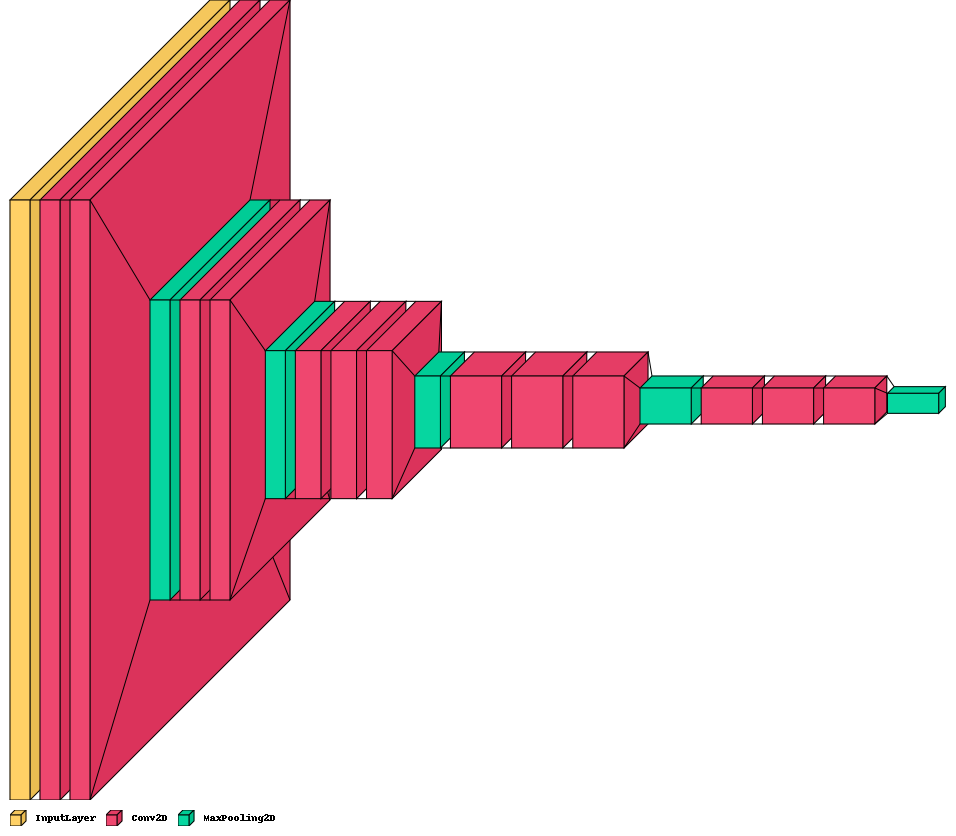

In [76]:
import visualkeras
#신경망 층의 시각화
visualkeras.layered_view(conv_base).show()
# 층 이름의 범례 표시
visualkeras.layered_view(conv_base, legend =True)

- 학습이 가능한 파라미터 종류의 수를 확인

In [48]:
print(f'학습 가능한 파라미터 종류의 수 : {len(conv_base.trainable_weights)}')

학습 가능한 파라미터 종류의 수 : 26


- 우리 모델에 VGG 16을 연결

In [86]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# 딥러닝 모델 생성
# 건물 토대 설계
model1 = Sequential()

# 입력층
model1.add(conv_base)

####################### 특징 추출부 끝 #######################
model1.add(Flatten())
####################### 분류 분석 시작 #######################
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))
model1.add(Dense(units = 32, activation = 'relu'))

# 출력층
model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 8192)              0         
                                                                 
 dense_55 (Dense)            (None, 64)                524352    
                                                                 
 dense_56 (Dense)            (None, 128)               8320      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 1)               

- 동결: 가져온 모델은 학습이 되지 않게 설정

In [87]:
print(f'훈련 가능한 파라미터의 종류: {len(model1.trainable_weights)}')

훈련 가능한 파라미터의 종류: 10


In [88]:
conv_base.trainable = False

In [89]:
print(f'훈련 가능한 파라미터의 종류: {len(model1.trainable_weights)}')

훈련 가능한 파라미터의 종류: 10


##  컴파일, 핏하기

In [92]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [93]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 22s 845ms/step - loss: 0.4496 - accuracy: 0.7875 - val_loss: 0.4628 - val_accuracy: 0.8350
Epoch 2/20
20/20 [==============================] - 17s 846ms/step - loss: 0.2228 - accuracy: 0.9250 - val_loss: 0.4281 - val_accuracy: 0.8430
Epoch 3/20
20/20 [==============================] - 16s 798ms/step - loss: 0.1355 - accuracy: 0.9490 - val_loss: 0.5308 - val_accuracy: 0.8370
Epoch 4/20
20/20 [==============================] - 16s 785ms/step - loss: 0.0968 - accuracy: 0.9635 - val_loss: 0.5280 - val_accuracy: 0.8420
Epoch 5/20
20/20 [==============================] - 16s 790ms/step - loss: 0.0964 - accuracy: 0.9650 - val_loss: 0.4557 - val_accuracy: 0.8450
Epoch 6/20
20/20 [==============================] - 16s 814ms/step - loss: 0.0759 - accuracy: 0.9725 - val_loss: 0.5314 - val_accuracy: 0.8440
Epoch 7/20
20/20 [==============================] - 16s 803ms/step - loss: 0.1052 - accuracy: 0.9620 - val_loss: 0.3721 - val_accuracy: 0.8670

- 미세조정(fine tuning) : 분류기가 연결되는 모델의 층만 학습이 되도록 동결을 풀어주는 것

In [91]:
# 마지막 층 (5번째 층)만 학습이 되도록 동결을 품
# 모델이 훈련이 가능하도록 설정
conv_base.trainable =True

set_trainable =False
#각 층을 돌면서 block5_conv1을 만나면 동결해제
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable =True

    if set_trainable :
      layer.trainable = True
    else :
      layer.trainable = False

In [85]:
print(f'훈련 가능한 파라미터의 종류: {len(model1.trainable_weights)}')

훈련 가능한 파라미터의 종류: 10


In [ ]:
# 학습 방법 설정
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
model1.fit(
    train_generator, #학습 데이터(X_train, y_train이 합쳐져 있다.)
    epochs = 20,
    validation_data = valid_generator
)

- Xception 모델을 전이 학습

In [96]:
from tensorflow.keras.applications import Xception

conv_base2 = Xception(weights ='imagenet',
                      include_top = False,
                      input_shape =(150,150,3))

83683744/83683744 [==============================] - 4s 0us/step


In [97]:
conv_base2.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

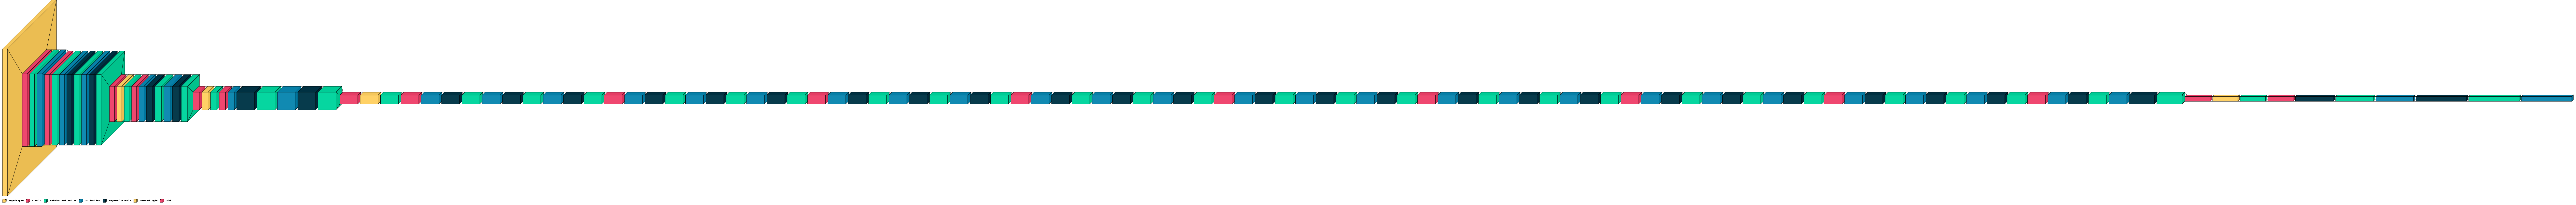

In [98]:
visualkeras.layered_view(conv_base2).show()
visualkeras.layered_view(conv_base2, legend =True)

In [99]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,  Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

# 딥러닝 모델 생성
# 건물 토대 설계
model2 = Sequential()

# 입력층
model2.add(conv_base2)

####################### 특징 추출부 끝 #######################
model2.add(Flatten())
####################### 분류 분석 시작 #######################
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 32, activation = 'relu'))

# 출력층
model2.add(Dense(units = 1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_10 (Flatten)        (None, 51200)             0         
                                                                 
 dense_60 (Dense)            (None, 64)                3276864   
                                                                 
 dense_61 (Dense)            (None, 128)               8320      
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 dense_64 (Dense)            (None, 1)               

In [100]:
conv_base2.trainable = False

- compile 및 fit

In [102]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model2.fit(
    train_generator,
    epochs =20,
    validation_data =valid_generator
)

Epoch 1/20
20/20 [==============================] - 17s 508ms/step - loss: 0.3218 - accuracy: 0.8830 - val_loss: 0.1518 - val_accuracy: 0.9400
Epoch 2/20
20/20 [==============================] - 11s 555ms/step - loss: 0.0800 - accuracy: 0.9705 - val_loss: 0.0916 - val_accuracy: 0.9650
Epoch 3/20
20/20 [==============================] - 11s 553ms/step - loss: 0.0379 - accuracy: 0.9830 - val_loss: 0.1351 - val_accuracy: 0.9600
Epoch 4/20
20/20 [==============================] - 9s 437ms/step - loss: 0.0294 - accuracy: 0.9885 - val_loss: 0.1257 - val_accuracy: 0.9620
Epoch 5/20
20/20 [==============================] - 9s 463ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.1297 - val_accuracy: 0.9620
Epoch 6/20
20/20 [==============================] - 9s 475ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.1227 - val_accuracy: 0.9660
Epoch 7/20
20/20 [==============================] - 9s 467ms/step - loss: 0.0082 - accuracy: 0.9965 - val_loss: 0.1167 - val_accuracy: 0.9650
Epo